In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('../../../../Downloads/liquor_store_sales.txt')

In [4]:
df.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [7]:
df1=df.groupby('ItemType')[['RetailSales','RetailTransfers','WarehouseSales']].sum()

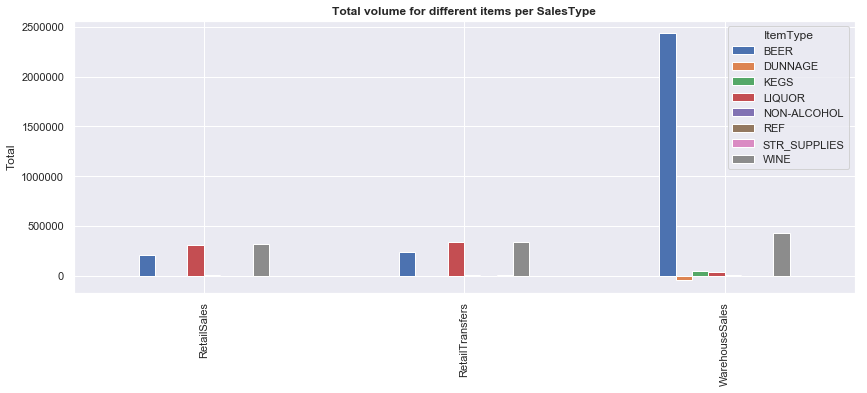

In [26]:
import seaborn as sns
sns.set()
df1.T.plot.bar(figsize=(14,5))
plt.title('Total volume for different items per SalesType',fontweight=700)
plt.ylabel('Total')
plt.show()


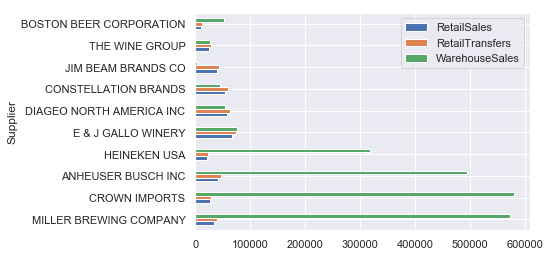

In [39]:
df2=df.groupby('Supplier')[['RetailSales','RetailTransfers','WarehouseSales']].sum()
df2['Total']=df2.sum(axis=1)
df2.sort_values(by='Total',ascending=False).head(10).drop('Total',axis=1).plot.barh()

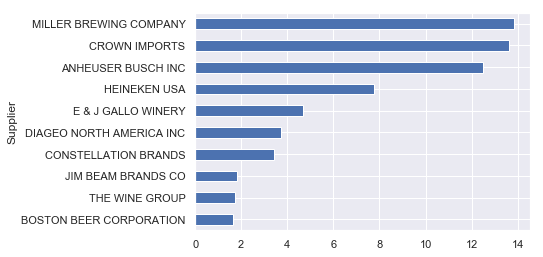

In [50]:
df3=df.groupby('Supplier')[['RetailSales','RetailTransfers','WarehouseSales']].sum().sum(axis=1)
(df3/df3.sum()*100).sort_values(ascending=True).tail(10).plot.barh()


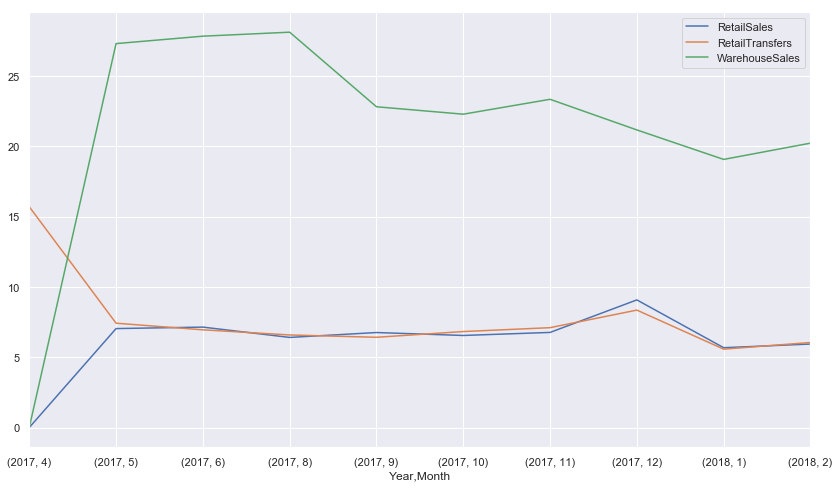

In [54]:
avg_sales=df.groupby(['Year','Month']).mean()

In [89]:
dct={1:'Jan',2:'Feb',3:'Mars',4:'Avr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
qwerty=[f'{dct[j]}\n{i}' for i,j in df.groupby(['Year','Month']).groups.keys()]

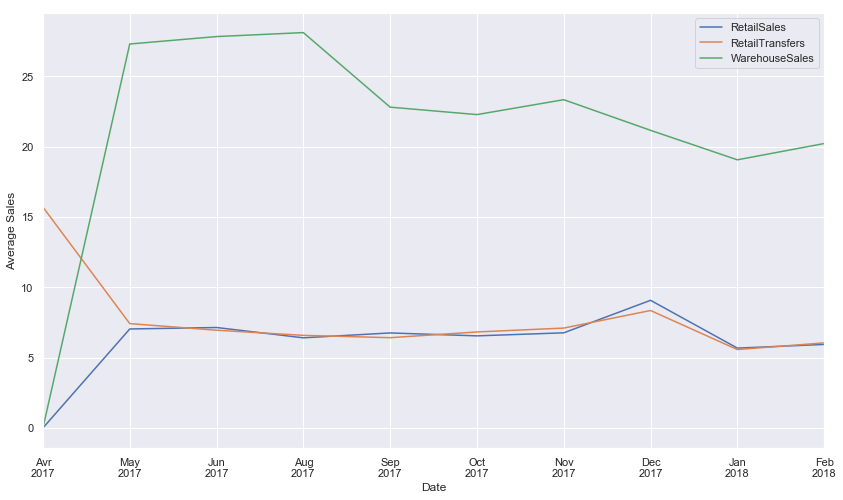

In [90]:
avg_sales.plot(figsize=(14,8))
plt.xticks(range(len(qwerty)),qwerty)
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.show()

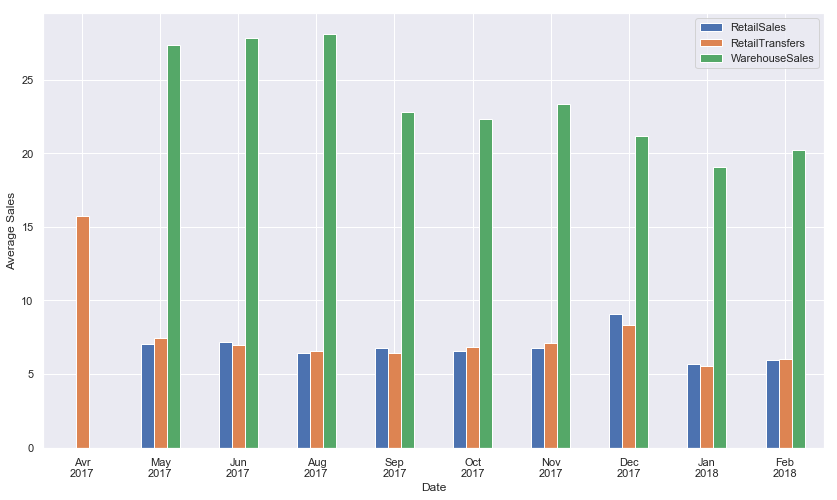

In [92]:
avg_sales.plot.bar(figsize=(14,8))
plt.xticks(range(len(qwerty)),qwerty, rotation=0)
plt.ylabel('Average Sales')
plt.xlabel('Date')
plt.show()

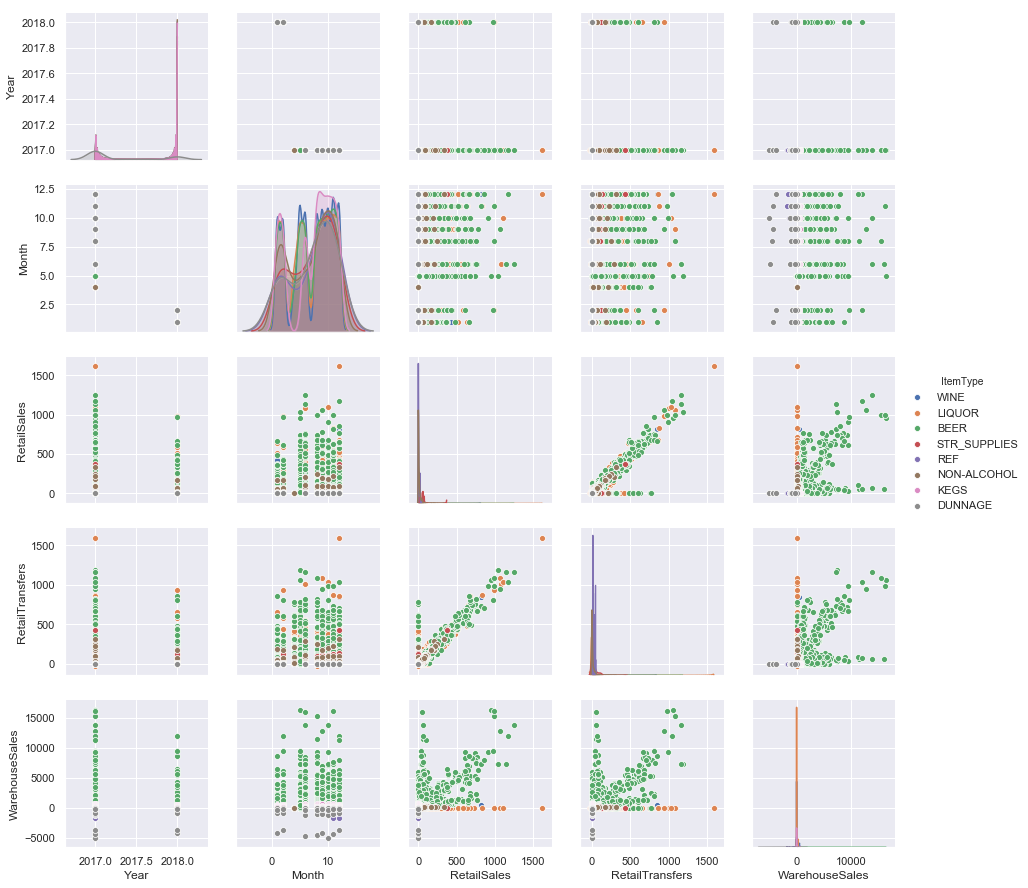

In [93]:
sns.pairplot(df,hue='ItemType')

In [94]:
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/blood_pressure.csv')

In [95]:
df.head()

,before,after
0,136.713072,92.432965
1,134.735618,105.022643
2,127.529115,82.242766
3,144.527126,93.607172
4,124.214720,103.212223


In [96]:
from scipy.stats import ttest_rel

In [97]:
ttest_rel(df.after,df.before)

Ttest_relResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [98]:
from scipy.stats import ttest_1samp

In [99]:
ttest_1samp(df.after-df.before,0)

Ttest_1sampResult(statistic=-27.291841767560236, pvalue=7.303035069608042e-48)

In [100]:
df.mean()

before    136.536953
after      99.236700
dtype: float64

In [101]:
df=pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/ab_test.csv')

In [102]:
df.head()

,a,b
0,0.27,13.61
1,6.08,21.53
2,13.74,9.23
3,9.70,5.36
4,7.00,12.90


In [104]:
df.std()

a    5.235270
b    6.491255
dtype: float64

In [105]:
from scipy.stats import ttest_ind

In [106]:
ttest_ind(df.a,df.b,equal_var=True)

Ttest_indResult(statistic=-2.637533181209767, pvalue=0.009713140852447347)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E916649DA0>,
      dtype=object)

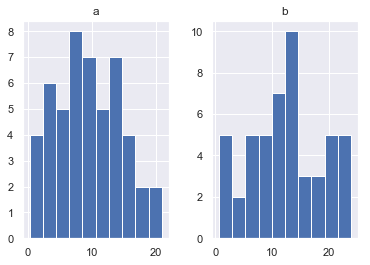

In [108]:
df.hist()

In [111]:
a=df.a.values[:-5]
b=df.b.values

In [112]:
ttest_ind(a,b,equal_var=True)

Ttest_indResult(statistic=-2.367422457403211, pvalue=0.019984370419562095)

In [113]:
ttest_rel(a,b)

ValueError: unequal length arrays

In [114]:
ttest_ind(a,b,equal_var=False)

Ttest_indResult(statistic=-2.3951051052478602, pvalue=0.01864660277707541)